Импорт библиотек

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

Загрузка данных

DATA_3

In [29]:
abs_data3 = [
    '0 %',
    '14 %',
    '3 %',
    '0 %',
    '14 %',
    '10 %',
    '19 %',
    '3 %',
    '4 %',
    '0 %',
    '0 %',
    '0 %',
    '0 %',
    '4 %',
    '10 %',
    '7 %',
    '0 %',
    '4 %',
    '0 %',
    '7 %',
    '7 %',
    '4 %',
    '3 %',
    '0 %',
    '4 %',
    '7 %',
    '11 %',
    '11 %',
    '0 %',
    '0 %',
    '19 %',
    '0 %',
    '0 %',
    '0 %',
    '4 %',
    '7 %',
    '0 %',
    '3 %',
    '14 %',
    '4 %',
    '3 %',
    '4 %',
    '0 %',
    '0 %',
    '0 %',
    '19 %',
    '4 %',
    '4 %',
    '0 %',
    '26 %',
    '3 %',
    '4 %',
    '0 %',
    '0 %',
    '7 %',
    '4 %',
    '7 %',
    '7 %',
    '7 %',
    '11 %',
    '4 %',
    '3 %',
    '4 %',
    '7 %',
    '4 %',
    '7 %',
    '4 %',
    '7 %',
    '11 %',
    '4 %',
    '0 %',
    '24 %',
    '7 %',
    '0 %',
    '11 %',
    '7 %',
    '0 %',
    '4 %',
    '0 %',
    ]

# Convert to decimal format
abs_data3 = [float(p.strip().replace(' %', '')) / 100 for p in abs_data3]

pf_data3 = [
    100,
    100,
    100,
    68,
    42,
    76,
    64,
    97,
    93,
    100,
    88,
    85,
    97,
    61,
    82,
    73,
    81,
    37,
    37,
    80,
    73,
    62,
    63,
    78,
    100,
    82,
    27,
    31,
    87,
    87,
    60,
    95,
    100,
    95,
    82,
    93,
    70,
    93,
    97,
    75,
    86,
    84,
    58,
    95,
    86,
    78,
    65,
    85,
    70,
    60,
    81,
    68,
    65,
    81,
    52,
    66,
    78,
    33,
    76,
    65,
    74,
    94,
    58,
    67,
    52,
    72,
    80,
    63,
    33,
    0,
    91,
    61,
    84,
    88,
    62,
    50,
    80,
    87,
    94,
    ]

fin_data3 = [
    45,
    100,
    100,
    63,
    55,
    78,
    45,
    98,
    100,
    75,
    100,
    88,
    63,
    63,
    70,
    59,
    88,
    50,
    63,
    100,
    50,
    50,
    81,
    63,
    100,
    55,
    63,
    0,
    100,
    100,
    96,
    63,
    100,
    63,
    25,
    88,
    88,
    85,
    60,
    88,
    70,
    100,
    88,
    100,
    97,
    87,
    75,
    88,
    95,
    40,
    65,
    88,
    100,
    100,
    50,
    0,
    100,
    0,
    25,
    63,
    100,
    80,
    75,
    38,
    88,
    45,
    100,
    88,
    50,
    np.nan,
    100,
    45,
    55,
    50,
    50,
    100,
    100,
    100,
    100,
]


re_data3 = [
    np.nan if i != 4 and i != 55 else 50 if i == 4 else 25 for i in range(len(fin_data3))
]


avg_data3 = [
    78,
    100,
    100,
    66,
    45,
    77,
    56,
    97,
    96,
    90,
    93,
    86,
    83,
    62,
    77,
    67,
    84,
    42,
    47,
    88,
    64,
    57,
    70,
    72,
    100,
    71,
    41,
    19,
    92,
    92,
    74,
    82,
    100,
    82,
    59,
    91,
    77,
    90,
    82,
    80,
    80,
    90,
    70,
    97,
    90,
    82,
    69,
    86,
    80,
    52,
    75,
    76,
    79,
    89,
    51,
    50,
    87,
    20,
    56,
    64,
    84,
    88,
    65,
    55,
    66,
    61,
    88,
    73,
    40,
    0,
    95,
    55,
    72,
    73,
    57,
    70,
    88,
    92,
    96,
]

lg_data3 = [
    'B-',
    'A',
    'A',
    'C',
    'FX',
    'B-',
    'D+',
    'A',
    'A',
    'A-',
    'A-',
    'B+',
    'B',
    'C-',
    'B-',
    'C',
    'B',
    'FX',
    'FX',
    'B+',
    'C-',
    'D+',
    'C+',
    'C+',
    'A',
    'C+',
    'FX',
    'F',
    'A-',
    'A-',
    'C+',
    'B',
    'A',
    'B',
    'D+',
    'A-',
    'B-',
    'A-',
    'B',
    'B',
    'B',
    'A-',
    'C+',
    'A',
    'A-',
    'B',
    'C',
    'B+',
    'B',
    'D',
    'B-',
    'B-',
    'B-',
    'B+',
    'D',
    'D',
    'B+',
    'F',
    'D+',
    'C-',
    'B',
    'B+',
    'C',
    'D+',
    'C',
    'C-',
    'B+',
    'C+',
    'FX',
    'F',
    'A',
    'D+',
    'C+',
    'C+',
    'D+',
    'C+',
    'B+',
    'A-',
    'A',
    ]

In [30]:
ABS_PERC2 = [
    17.0,
    19.0, 
    21.0,
    24.0,
    21.0,
    29.0,
    5.0,
    26.0,
    0.0,
    24.0,
    10.0,
    7.0,
    21.0,
    0.0,
    0.0,
    0.0,
    50.0,
    7.0,
    7.0,
    2.0,
    10.0,
    26.0,
    26.0,
    29.0,
    0.0,
    5.0,
    5.0,
    14.0,
    29.0,
    21.0,
    12.0,
    14.0,
    26.0,
    7.0,
    10.0,
    36.0
]

PF2 = [
    21,
    7,
    70,
    83,
    100,
    82,
    80,
    82,
    100,
    7,
    100,
    100,
    95,
    73,
    92,
    100,
    'failed',
    95,
    100,
    88,
    93,
    100,
    7,
    53,
    100,
    75,
    73,
    92,
    100,
    100,
    100,
    100,
    58,
    67,
    90,
    'failed'
]

FINAL2 = [
    'abs',
    np.nan,
    10,
    40,
    33,
    55,
    45,
    10,
    95,
    np.nan,
    65,
    55,
    25,
    65,
    28,
    74,
    'failed',
    38,
    33,
    15,
    53,
    50,
    np.nan,
    48,
    37,
    30,
    35,
    8,
    30,
    48,
    45,
    53,
    10,
    0,
    40,
    'failed'
]

RE2 = [
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    40,
    np.nan,
    np.nan,
    'failed',
]

AVG2 = [
    0,
    4,
    46,
    66,
    73,
    71,
    66,
    53,
    98,
    4,
    86,
    82,
    67,
    70,
    66,
    90,
    0,
    72,
    73,
    59,
    77,
    80,
    4,
    51,
    75,
    57,
    58,
    58,
    72,
    79,
    78,
    81,
    51,
    40,
    70,
    0,
]

LG2 = [
    'F',
    'F',
    'FX',
    'C',
    'C+',
    'C+',
    'C',
    'D',
    'A',
    'F',
    'B+',
    'B',
    'C',
    'C+',
    'C',
    'A-',
    'F',
    'C+',
    'C+',
    'D+',
    'B-',
    'B',
    'F',
    'D',
    'B-',
    'D+',
    'D+',
    'D+',
    'C+',
    'B-',
    'B-',
    'B',
    'D',
    'FX',
    'C+',
    'F'
]

In [31]:
#Course Absence Rate
ABS_PERC = [
    "3 %",
    "25 %",
    "29 %",
    "10 %",
    "10 %",
    "8 %",
    "0 %",
    "10 %",
    "7 %",
    "0 %",
    "7 %",
    "0 %",
    "0 %",
    "5 %",
    "5 %",
    "0 %",
    "10 %",
    "8 %",
    "0 %",
    "33 %",
    "0 %",
    "27 %",
    "27 %",
    "8 %",
    "8 %",
    "17 %",
    "63 %",
    "15 %",
    "8 %",
    "3 %",
    "23 %",
    "43 %",
    "0 %",
    "17 %",
    "13 %",
    "0 %",
    "33 %",
    "8 %",
    "7 %",
    "20 %",
    "23 %",
    "30 %",
    "2 %",
    "30 %",
    "22 %",
    "3 %",
    "3 %",
    "25 %",
    "8 %",
    "17 %",
    "28 %",
    "0 %",
    "10 %",
    "8 %",
    "10 %",
    "5 %",
    "48 %",
    "29 %",
    "0 %",
    "15 %",
    "3 %",
    "10 %",
    "20 %",
    "25 %",
    "10 %",
    "3 %",
    "2 %",
    "10 %",
    "20 %",
    "0 %",
    "5 %",
    "18 %",
    "30 %",
    "65 %",
    "5 %",
    "8 %",
    "8 %",
    "18 %",
    "25 %",
    "0 %",
    "15 %",
    "12 %",
    "17 %",
    "20 %",
    "15 %",
    "0 %",
    "8 %",
    "0 %",
    "0 %",
    "23 %"
]

# Convert to decimal format
ABS_PERC = [float(p.strip().replace(' %', '')) / 100 for p in ABS_PERC]

PF = [
    92,
    100,
    90,
    87,
    85,
    93,
    100,
    100,
    100,
    98,
    75,
    100,
    100,
    100,
    100,
    68,
    63,
    100,
    100,
    'failed',
    100,
    100,
    92,
    100,
    63,
    100,
    'failed',
    100,
    100,
    100,
    96,
    'failed',
    98,
    88,
    88,
    68,
    'failed',
    100,
    100,
    100,
    73,
    0,
    83,
    76,
    100,
    100,
    98,
    58,
    73,
    100,
    67,
    100,
    100,
    100,
    100,
    100,
    'failed',
    88,
    100,
    75,
    100,
    100,
    100,
    70,
    45,
    100,
    100,
    92,
    83,
    100,
    100,
    60,
    58,
    'failed',
    80,
    70,
    100,
    100,
    42,
    100,
    100,
    73,
    100,
    25,
    100,
    83,
    88,
    100,
    97,
    68,
]

FINAL = [
    36,
    28,
    10,
    13,
    10,
    35,
    75,
    75,
    24,
    30,
    62,
    93,
    80,
    53,
    35,
    22,
    68,
    38,
    88,
    'failed',
    70,
    60,
    10,
    75,
    38,
    75,
    'failed',
    90,
    43,
    68,
    29,
    'failed',
    40,
    13,
    10,
    38,
    'failed',
    38,
    8,
    40,
    20,
    np.nan,
    70,
    13,
    30,
    90,
    40,
    35,
    18,
    63,
    30,
    80,
    15,
    74,
    60,
    55,
    'failed',
    15,
    25,
    62,
    53,
    33,
    75,
    20,
    13,
    87,
    65,
    38,
    15,
    74,
    55,
    8,
    0,
    'failed',
    30,
    25,
    50,
    43,
    0,
    78,
    55,
    28,
    8,
    'abs',
    25,
    30,
    25,
    38,
    63,
    25,
]

RE = [
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    33,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    34,
    np.nan,
    'failed',
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
]

AVG = [
    70,
    71,
    58,
    57,
    55,
    70,
    90,
    90,
    70,
    71,
    70,
    97,
    92,
    81,
    74,
    50,
    65,
    75,
    95,
    0,
    88,
    84,
    59,
    90,
    53,
    90,
    0,
    96,
    77,
    87,
    69,
    0,
    75,
    58,
    57,
    56,
    0,
    75,
    63,
    76,
    52,
    0,
    78,
    51,
    72,
    96,
    75,
    49,
    51,
    85,
    52,
    92,
    66,
    90,
    84,
    82,
    0,
    59,
    70,
    70,
    81,
    73,
    90,
    50,
    40,
    95,
    86,
    70,
    56,
    90,
    82,
    50,
    35,
    0,
    60,
    52,
    80,
    77,
    25,
    91,
    82,
    55,
    63,
    0,
    70,
    62,
    63,
    75,
    83,
    51,
]


LG = [
    "C+",
    "C+",
    "D+",
    "D+",
    "D+",
    "C+",
    "A-",
    "A-",
    "C+",
    "C+",
    "C+",
    "A",
    "A-",
    "B",
    "C+",
    "D",
    "C",
    "B-",
    "A",
    "F",
    "B+",
    "B",
    "D+",
    "A-",
    "D",
    "A-",
    "F",
    "A",
    "B-",
    "B+",
    "C",
    "F",
    "B-",
    "D+",
    "D+",
    "D+",
    "F",
    "B-",
    "C-",
    "B-",
    "D",
    "F",
    "B-",
    "D",
    "C+",
    "A",
    "B-",
    "FX",
    "D",
    "B+",
    "D",
    "A-",
    "C",
    "A-",
    "B",
    "B",
    "F",
    "D+",
    "C+",
    "C+",
    "B",
    "C+",
    "A-",
    "D",
    "FX",
    "A",
    "B+",
    "C+",
    "D+",
    "A-",
    "B",
    "D",
    "FX",
    "F",
    "C-",
    "D",
    "B",
    "B-",
    "FX",
    "A-",
    "B",
    "D+",
    "C-",
    "F",
    "C+",
    "C-",
    "C-",
    "B-",
    "B",
    "D"
]



IDS - ID students  
ABS_PERC - Course Absence Rate  
PF - Pre-final  
FINAL - Final  
RE - Resit Exam  
AVG - Average  
LG - Letter Grade  

Feature columns = ['Course Absence Rate', 'PF']  
Target column = 'FIN'

In [32]:
df1 = pd.DataFrame({
    'Course Absence Rate': ABS_PERC,
    'PF': PF,
    'FIN': FINAL,
    'RE': RE,
    'AVG': AVG,
    'LG': LG
})

In [35]:
df2 = pd.DataFrame({
    'Course Absence Rate': ABS_PERC2,
    'PF': PF2,
    'FIN': FINAL2,
    'RE': RE2,
    'AVG': AVG2,
    'LG': LG2
})

In [37]:
df2['Course Absence Rate'] = df2['Course Absence Rate']/100

In [39]:
df3 = pd.DataFrame({
    'Course Absence Rate': abs_data3,
    'PF': pf_data3,
    'FIN': fin_data3,
    'RE': re_data3,
    'AVG': avg_data3,
    'LG': lg_data3
})

In [40]:
data = pd.concat([df1, df2, df3], ignore_index=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Absence Rate  205 non-null    float64
 1   PF                   205 non-null    object 
 2   FIN                  200 non-null    object 
 3   RE                   13 non-null     object 
 4   AVG                  205 non-null    int64  
 5   LG                   205 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.7+ KB


Предоброботка данных

In [45]:
# Fill NaN values in column 'FIN' with 0
data['FIN'].fillna(0, inplace=True)

# Replace 'failed' with 0 in column 'FIN'
data['FIN'] = data['FIN'].replace('failed', 0)
# Replace 'abs' with 0 in column 'FIN'
data['FIN'] = data['FIN'].replace('abs', 0)
# Convert column 'FIN' to numeric type
data['FIN'] = pd.to_numeric(data['FIN'])
data['FIN'] = data['FIN']/100

# Replace 'failed' with 0 in column 'PF'
data['PF'] = data['PF'].replace('failed', 0)
# Convert column 'PF' to numeric type
data['PF'] = pd.to_numeric(data['PF'])
data['PF'] = data['PF']/100

data.drop('RE', axis=1, inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Absence Rate  205 non-null    float64
 1   PF                   205 non-null    float64
 2   FIN                  205 non-null    float64
 3   AVG                  205 non-null    int64  
 4   LG                   205 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 8.1+ KB


In [47]:
data.head(3)

,Course Absence Rate,PF,FIN,AVG,LG
0,0.03,0.92,0.36,70,C+
1,0.25,1.00,0.28,71,C+
2,0.29,0.90,0.10,58,D+


To preprocess the data for a neural network, we need to perform several steps including scaling numerical features, encoding categorical features, and possibly handling class imbalance if present. Here's how you can preprocess the given data for a neural network:

1. Scaling Numerical Features: Scale numerical features to a similar range to ensure that they contribute equally to the model training process.
2. Encoding Categorical Features: Encode categorical features into numerical representations since most machine learning algorithms, including neural networks, work with numerical data.
3. Handling Class Imbalance (if applicable): If the distribution of classes in the target variable (in this case, Letter Grade) is imbalanced, you might need to apply techniques like oversampling, undersampling, or using class weights to handle it.

In [49]:
data.to_csv('dataset/all_data.csv', index=False)

In [13]:
# Assuming your DataFrame is named 'df'
# Step 1: Scaling Numerical Features
scaler = MinMaxScaler()
numerical_features = ['Course Absence Rate', 'PF', 'FIN', 'AVG']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
data

,Course Absence Rate,PF,FIN,RE,AVG,LG
0,0.0006,0.92,0.36,0,0.70,C+
1,0.0050,1.00,0.28,0,0.71,C+
2,0.0058,0.90,0.10,0,0.58,D+
3,0.0020,0.87,0.13,0,0.57,D+
4,0.0020,0.85,0.10,0,0.55,D+
...,...,...,...,...,...,...
200,0.0022,0.62,0.50,0,0.57,D+
201,0.0014,0.50,1.00,0,0.70,C+
202,0.0000,0.80,1.00,0,0.88,B+
203,0.0008,0.87,1.00,0,0.92,A-


In [15]:
# Define input features and target variable
X = data[['Course Absence Rate', 'PF']]
y = data['FIN']

Model Construction:


In [16]:
# Define the architecture of the neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define input, hidden, and output sizes
input_size = 2
hidden_size = 64  # You can adjust this based on your problem complexity
output_size = 1  # Since the target variable is continuous (FIN)

# Instantiate the model
model = Net(input_size, hidden_size, output_size)

# Define loss function, optimizer, and learning rate
criterion = nn.MSELoss()  # Mean Squared Error loss for regression task
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate

Splitting the Data into Training, Validation, and Test Sets:


In [17]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values).view(-1, 1)  # Reshape to match the model output
X_val_tensor = torch.Tensor(X_val.values)
y_val_tensor = torch.Tensor(y_val.values).view(-1, 1)  # Reshape to match the model output
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.Tensor(y_test.values).view(-1, 1)  # Reshape to match the model output


Training the Initial Model:


In [18]:
# Training the model
epochs = 1000  # You can adjust the number of epochs
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    # Print training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Epoch [10/1000], Train Loss: 0.0850, Val Loss: 0.0680
Epoch [20/1000], Train Loss: 0.0822, Val Loss: 0.0662
Epoch [30/1000], Train Loss: 0.0804, Val Loss: 0.0647
Epoch [40/1000], Train Loss: 0.0795, Val Loss: 0.0642
Epoch [50/1000], Train Loss: 0.0790, Val Loss: 0.0640
Epoch [60/1000], Train Loss: 0.0785, Val Loss: 0.0637
Epoch [70/1000], Train Loss: 0.0782, Val Loss: 0.0634
Epoch [80/1000], Train Loss: 0.0779, Val Loss: 0.0631
Epoch [90/1000], Train Loss: 0.0776, Val Loss: 0.0628
Epoch [100/1000], Train Loss: 0.0773, Val Loss: 0.0626
Epoch [110/1000], Train Loss: 0.0771, Val Loss: 0.0625
Epoch [120/1000], Train Loss: 0.0769, Val Loss: 0.0624
Epoch [130/1000], Train Loss: 0.0767, Val Loss: 0.0624
Epoch [140/1000], Train Loss: 0.0766, Val Loss: 0.0624
Epoch [150/1000], Train Loss: 0.0765, Val Loss: 0.0624
Epoch [160/1000], Train Loss: 0.0763, Val Loss: 0.0624
Epoch [170/1000], Train Loss: 0.0762, Val Loss: 0.0625
Epoch [180/1000], Train Loss: 0.0761, Val Loss: 0.0625
Epoch [190/1000], T

Evaluation and Analysis:


In [19]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)

# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_tensor.numpy(), test_outputs.numpy())
rmse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy(), squared=False)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 0.23
RMSE: 0.28


MAE: 0.23
RMSE: 0.28


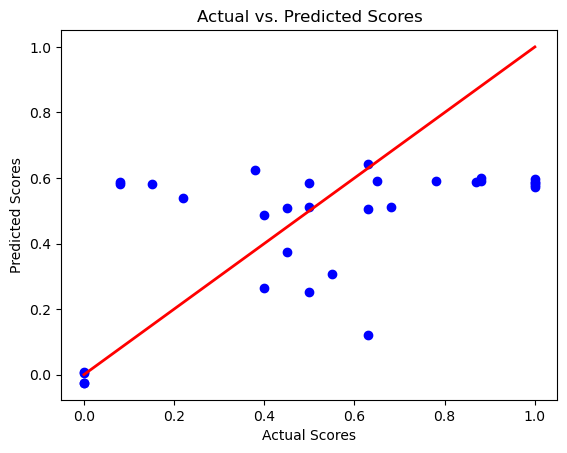

In [20]:
# Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_tensor.numpy(), test_outputs.numpy())
rmse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy(), squared=False)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Visualizing predicted scores against actual scores
plt.scatter(y_test_tensor.numpy(), test_outputs.numpy(), color='blue')
plt.plot([y_test_tensor.numpy().min(), y_test_tensor.numpy().max()], [y_test_tensor.numpy().min(), y_test_tensor.numpy().max()], color='red', linewidth=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs. Predicted Scores')
plt.show()


With an MAE of 0.23 and an RMSE of 0.28, it seems like your neural network model is performing very well on the test data. However, to ensure that the model is not overfitting, you can perform the following additional checks:

1. **Compare Training and Validation Losses**: If the training loss is much lower than the validation loss, it could indicate overfitting. Ensure that the validation loss is not significantly higher than the training loss throughout the training process.

2. **Use Regularization Techniques**: Consider adding regularization techniques such as L1 or L2 regularization, dropout, or early stopping to prevent overfitting.

3. **Cross-Validation**: If your dataset allows it, perform k-fold cross-validation to validate the model's performance across different subsets of the data.

4. **Inspect Learning Curves**: Plot the learning curves (training and validation losses) to visualize the model's performance during training. Look for signs of overfitting, such as a large gap between the training and validation losses.

5. **Evaluate on Unseen Data**: If possible, obtain additional unseen data and evaluate the model's performance on it. This will provide further insight into how well the model generalizes to new data.

If, after performing these checks, you find that the model is indeed overfitting, you may need to revisit the model architecture, adjust hyperparameters, or collect more data to improve its generalization performance.

Comparing Training and Validation Losses

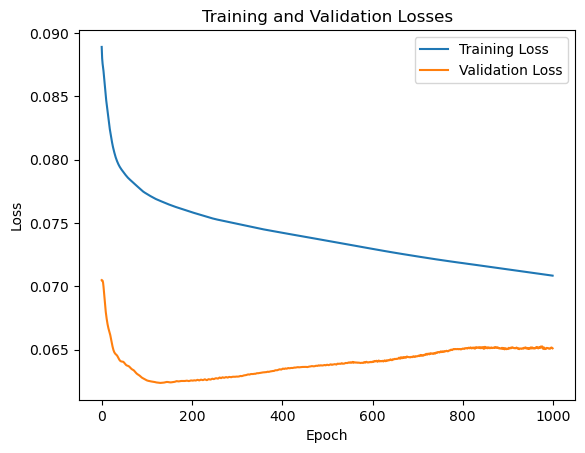

In [21]:
import matplotlib.pyplot as plt

# Plotting learning curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


Using Regularization Techniques:
You can add L2 regularization to your optimizer. For example:

In [22]:
# Add L2 regularization to the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adjust the weight decay value as needed


Cross-Validation:
If you want to perform k-fold cross-validation, you can use the KFold class from scikit-learn. For example:

In [23]:
from sklearn.model_selection import KFold
import numpy as np

# Define number of folds
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
mae_scores = []
rmse_scores = []

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the model
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.Tensor(X_train_fold.values))
    loss = criterion(outputs, torch.Tensor(y_train_fold.values).view(-1, 1))
    loss.backward()
    optimizer.step()

    # Evaluate the model on validation data
    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.Tensor(X_val_fold.values))
        val_loss = criterion(val_outputs, torch.Tensor(y_val_fold.values).view(-1, 1))
        mae = mean_absolute_error(y_val_fold.values, val_outputs.numpy())
        rmse = mean_squared_error(y_val_fold.values, val_outputs.numpy(), squared=False)
        mae_scores.append(mae)
        rmse_scores.append(rmse)

        print(f'Fold {fold+1}: MAE: {mae:.4f}, RMSE: {rmse:.4f}')

# Calculate average MAE and RMSE across folds
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
print(f'Average MAE across folds: {avg_mae:.4f}')
print(f'Average RMSE across folds: {avg_rmse:.4f}')


Fold 1: MAE: 0.2406, RMSE: 0.2744
Fold 2: MAE: 0.2358, RMSE: 0.2824
Fold 3: MAE: 0.2395, RMSE: 0.2726
Fold 4: MAE: 0.1806, RMSE: 0.2305
Fold 5: MAE: 0.2125, RMSE: 0.2714
Average MAE across folds: 0.2218
Average RMSE across folds: 0.2663


In [24]:
# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_outputs = model(torch.Tensor(X_test_tensor))
    test_loss = criterion(test_outputs, y_test_tensor)
    mae = mean_absolute_error(y_test_tensor.numpy(), test_outputs.numpy())
    rmse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy(), squared=False)

print(f'Test MAE: {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')


Test MAE: 0.2332
Test RMSE: 0.2874


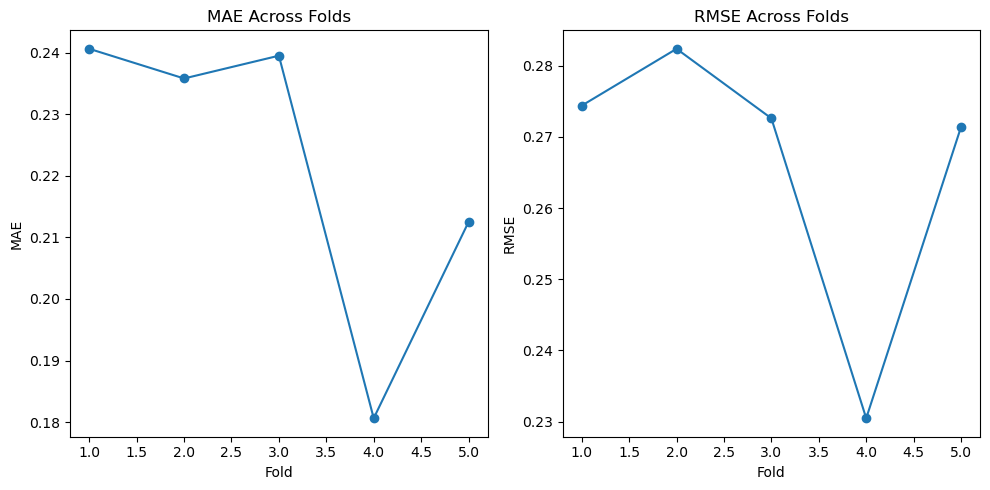

In [25]:
# Plotting average MAE and RMSE across folds
plt.figure(figsize=(10, 5))

# MAE
plt.subplot(1, 2, 1)
plt.plot(range(1, k_folds + 1), mae_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('MAE Across Folds')

# RMSE
plt.subplot(1, 2, 2)
plt.plot(range(1, k_folds + 1), rmse_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE Across Folds')

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Convert tensors to numpy arrays
actual_fin = y_test_tensor.numpy().flatten()
predicted_fin = test_outputs.numpy().flatten()

# Create DataFrame
df_results = pd.DataFrame({'Actual FIN': actual_fin, 'Predicted FIN': predicted_fin.round(2)})

# Display the DataFrame
print(df_results)


    Actual FIN  Predicted FIN
0         0.00          -0.04
1         1.00           0.58
2         0.22           0.53
3         0.00          -0.04
4         0.55           0.28
5         0.00          -0.02
6         0.88           0.57
7         0.87           0.57
8         0.68           0.50
9         0.50           0.56
10        0.38           0.61
11        1.00           0.56
12        0.63           0.49
13        0.40           0.48
14        1.00           0.57
15        0.78           0.57
16        0.45           0.50
17        0.08           0.56
18        0.40           0.24
19        0.50           0.50
20        0.63           0.62
21        0.45           0.35
22        0.15           0.57
23        0.08           0.56
24        0.50           0.24
25        0.00          -0.01
26        1.00           0.57
27        0.88           0.59
28        0.65           0.57
29        1.00           0.57
30        0.63           0.10


In [27]:
# Convert tensors to numpy arrays for validation set
val_outputs = model(X_val_tensor)
val_predicted_fin = val_outputs.detach().numpy().flatten()
val_actual_fin = y_val_tensor.numpy().flatten()

# Create DataFrame for validation set
df_val_results = pd.DataFrame({'Actual FIN': val_actual_fin, 'Predicted FIN': val_predicted_fin.round(2)})

# Concatenate validation and test results
df_results = pd.concat([df_val_results, df_results], axis=0)

# Display the DataFrame
print(df_results)


    Actual FIN  Predicted FIN
0         0.50           0.54
1         0.00          -0.04
2         0.88           0.48
3         0.75           0.56
4         0.45           0.30
..         ...            ...
26        1.00           0.57
27        0.88           0.59
28        0.65           0.57
29        1.00           0.57
30        0.63           0.10

[62 rows x 2 columns]
